# Healthy Pandas Code 

## Notebook Setup & Imports

In [146]:
import pandas as pd
import numpy as np

import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

import folium
import seaborn as sns
from scipy import stats
import json

from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict

from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import re
from PIL import Image
from IPython.display import Image as im

from nltk.draw.dispersion import dispersion_plot

In [142]:
!pip install gensim==3.6.0
! conda list| findstr gensim
!pip install wordcloud

     |████████████████████████████████| 23.1 MB 325 kB/s eta 0:00:01
  Created wheel for gensim: filename=gensim-3.6.0-cp39-cp39-macosx_10_9_x86_64.whl size=23218285 sha256=d5d7e69eba47ba17a68756b2db4025c75de9bb3789069988caf586e3101034e7
  Stored in directory: /Users/shrutiagarwal/Library/Caches/pip/wheels/61/12/f2/84de20fba5e870553796b0834d11109992f06ddc20aaead086
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2
zsh:1: command not found: findstr

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/conda/exceptions.py", line 1118, in __call__
        return func(*args, **kwargs)
      File "/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/conda/cli/main.py", line 69, in main_subshell
        exit_code = do_call(args, p)
   

In [84]:
dataset = 'winemag-data-130k-v2.csv'

In [85]:
df = pd.read_csv(dataset, index_col = 'Unnamed: 0')

In [86]:
df = df.dropna(subset=["country", "description", "points", "price", "province", "variety"]).reset_index().drop("index", axis=1)
df = df.drop_duplicates("description")
df["country"] = np.where(df["country"] == "US", "United States of America", df["country"])
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120910,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
120911,United States of America,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
120912,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
120913,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Data Cleaning


In [87]:
"""Trying to understand and clean the data, Dropping Nan values"""

df.info()
df.isnull().any()
df = df.drop(columns = ['designation','region_1','region_2','taster_name','taster_twitter_handle','title','winery'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111511 entries, 0 to 120914
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                111511 non-null  object 
 1   description            111511 non-null  object 
 2   designation            79472 non-null   object 
 3   points                 111511 non-null  int64  
 4   price                  111511 non-null  float64
 5   province               111511 non-null  object 
 6   region_1               93556 non-null   object 
 7   region_2               46559 non-null   object 
 8   taster_name            88244 non-null   object 
 9   taster_twitter_handle  83761 non-null   object 
 10  title                  111511 non-null  object 
 11  variety                111511 non-null  object 
 12  winery                 111511 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


In [88]:
"""Data cleaning for outliers"""

df = df[df['price']<100]

In [89]:
#df = df.dropna(subset=['price','points','country','province','variety','winery']).reset_index(drop=True)

# Exploratory Data Analysis 

<AxesSubplot:xlabel='points'>

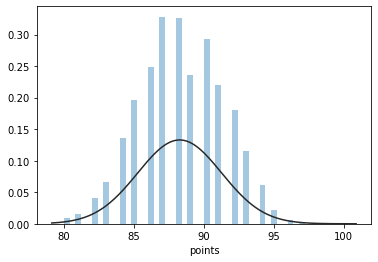

In [9]:
sns.distplot(df['points'], kde=False, fit=stats.norm)

<AxesSubplot:ylabel='Frequency'>

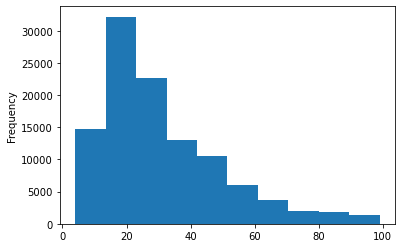

In [10]:
df[df['price'] < 100]['price'].plot.hist()

<AxesSubplot:xlabel='price', ylabel='points'>

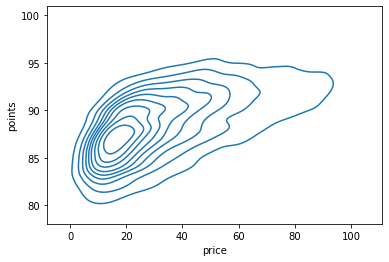

In [11]:
sns.kdeplot(data=df[df['price'] < 100].loc[:, ['price', 'points']].sample(10000), x='price', y='points')

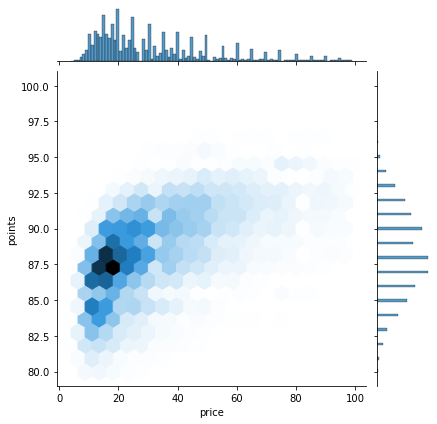

In [12]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 100], kind='hex', gridsize=20)

<AxesSubplot:xlabel='variety', ylabel='points'>

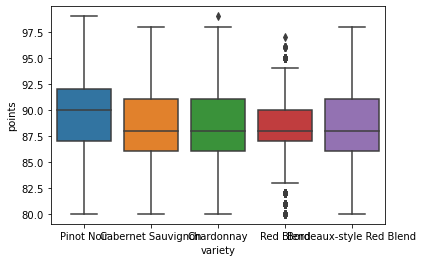

In [13]:
df_top_5 = df[df["variety"].isin(df["variety"].value_counts().head(5).index)]
sns.boxplot(data=df_top_5, x="variety", y="points")

<AxesSubplot:xlabel='points'>

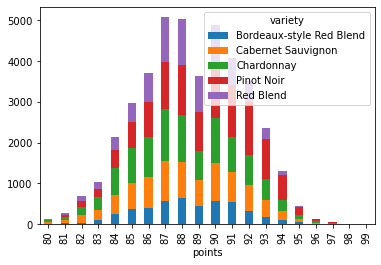

In [14]:
df_top_5[["points", "variety"]].value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='points', ylabel='description_length'>

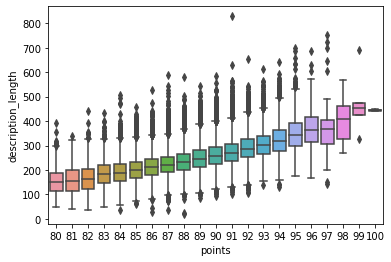

In [15]:
df["description_length"] = df["description"].apply(len)
sns.boxplot(data=df, x="points", y="description_length")


In [16]:
"""JSON cleaning"""

with open("countries.json") as f:
    raw_countries_json = json.load(f)
countries_json = {"type": "FeatureCollection", "features" : []}
for feature in raw_countries_json["features"]:
    if feature["properties"]["name"] in df["country"].unique():
        countries_json["features"].append(feature)


FileNotFoundError: [Errno 2] No such file or directory: 'countries.json'

In [17]:
m = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_json,
    data=df,
    columns=["country", "price"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    name="Price",
).add_to(m)

folium.LayerControl().add_to(m)

m

NameError: name 'countries_json' is not defined

# Sentimental Analysis 

In [90]:
headers = ['pos','neg','neu','compound']
texts = df["description"]
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['description']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['description']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['description']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['description']]

In [91]:
df

,country,description,points,price,province,variety,compound,neg,neu,pos
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red,0.6486,0.000,0.872,0.128
1,United States of America,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris,-0.1280,0.053,0.947,0.000
2,United States of America,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling,0.3400,0.000,0.930,0.070
3,United States of America,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir,0.8176,0.000,0.817,0.183
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tempranillo-Merlot,0.1655,0.000,0.961,0.039
...,...,...,...,...,...,...,...,...,...,...
120910,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Riesling,0.7331,0.000,0.838,0.162
120911,United States of America,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Pinot Noir,0.5267,0.000,0.916,0.084
120912,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Gewürztraminer,0.1548,0.068,0.873,0.059
120913,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Pinot Gris,0.5267,0.000,0.896,0.104


## WordClouds

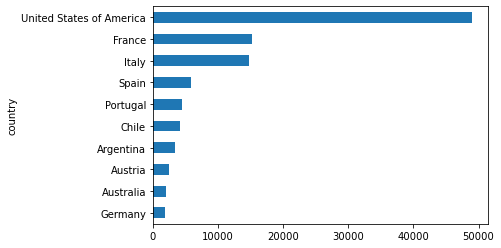

In [20]:
"""Looking at number of reviews by each country to select country with most reviews for word cloud generation """
df1 = df["country"]
num_of_reviews = df1.groupby(df["country"]).count()
num = num_of_reviews.sort_values(ascending=True)

"""Reviews of top 10 countries"""
reviews = num.tail(10)

bargraph = reviews.plot.barh(x='country', y='reviews[1]')

In [21]:
"""Specifiying stopwords for the reviews"""

stopwords_reviews = ["wine", "review", "drink", "bottle", "flavor", "well" 
                     "hint", "finish", "palate", "show", "now", "full",
                     "flavors", "shows", "fruit", "will", "give", "made"]
stopwords_updated = set(STOPWORDS)
stopwords_updated.update(stopwords_reviews)

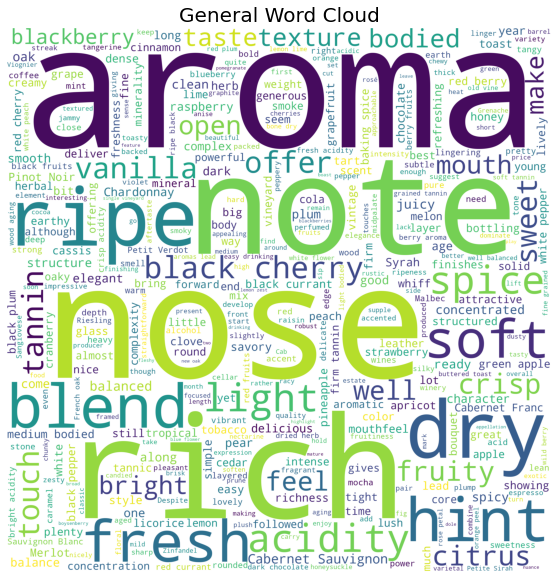

In [22]:
"""Making a general word cloud for all descriptions"""

%matplotlib inline

text = df['description'].astype(str)
wordcloud = WordCloud(stopwords=stopwords_updated,
                      background_color='white',
                      width=3000,height=3000, 
                      max_words=400).generate(" ".join(text)) 

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.title("General Word Cloud",fontsize=20)
plt.axis('off')
plt.show()

In [23]:
"""Using a default dictionary to add all descriptions for every specific country together"""

descriptions = defaultdict(list)
df.apply(lambda words: descriptions[words.country].append(words.description), axis=1)

country_list = list(df.country.unique())
for country in country_list:
    string = ' '.join(descriptions[country])
    descriptions[country] = ' '.join([word.lower() for word in re.sub(re.compile('[^A-Za-z ]+'), ' ', string).split()])

In [24]:
"Making a dictionary with country name as key and file path to base image as value"
base = {}

base['United States of America'] = "usa_bw_map.jpg"
base['France'] = "france_bw_map.jpg"
base['Italy'] = "italy_bw_map.jpg"
base['Spain'] = "spain_bw_map.jpg"
base['Portugal'] = "portugal_bw_map.jpg"
base['Chile'] = "chile_bw_map.jpg"
base['Argentina'] = "argentina_bw_map.jpg"
base['Austria'] = "austria_bw_map.jpg"
base['Australia'] = "australia_bw_map.jpg"
base['Germany'] = "germany_bw_map.jpg"

In [25]:
def country_wordcloud(reviews_country, base_image):
    base = np.array(Image.open(base_image))
    wordcloud = WordCloud(background_color="white", max_words=400, mask=base, 
                   stopwords=stopwords_updated, colormap='jet').generate(reviews_country)
    
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis('off')

In [26]:
reviews_country = descriptions['United States of America']
wordcloud = country_wordcloud(reviews_country, base['United States of America'])

FileNotFoundError: [Errno 2] No such file or directory: 'usa_bw_map.jpg'

In [27]:
reviews_country = descriptions['France']
wordcloud = country_wordcloud(reviews_country, base['France'])


FileNotFoundError: [Errno 2] No such file or directory: 'france_bw_map.jpg'

In [28]:
reviews_country = descriptions['Italy']
wordcloud = country_wordcloud(reviews_country, base['Italy'], 'Italy.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [29]:
reviews_country = descriptions['Spain']
wordcloud = country_wordcloud(reviews_country, base['Spain'], 'Spain.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [30]:
reviews_country = descriptions['Portugal']
wordcloud = country_wordcloud(reviews_country,base ['Portugal'], 'Portugal.jpg')


TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [31]:
reviews_country = descriptions['Chile']
wordcloud = country_wordcloud(reviews_country, base['Chile'], 'chile.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [32]:
reviews_country = descriptions['Argentina']
wordcloud = country_wordcloud(reviews_country, base['Argentina'], 'argentina.jpg')


TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [33]:
reviews_country = descriptions['Austria']
wordcloud = country_wordcloud(reviews_country, base['Austria'], 'austria.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [34]:
words = descriptions['Australia']
wordcloud = country_wordcloud(reviews_country, base['Australia'], 'australia.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

In [35]:
words = descriptions['Germany']
wordcloud = country_wordcloud(reviews_country, base['Germany'], 'germany.jpg')

TypeError: country_wordcloud() takes 2 positional arguments but 3 were given

# Topic modelling

In [36]:
texts = [[word for word in desc.lower().split() if word not in STOPWORDS and word.isalnum() and not word.lower() in ['wine', 'drink']] for desc in list(df["description"].values)]
dictionary = corpora.Dictionary(texts) #(word_id,word) pairs not word.lower() == 'slate'
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence


In [37]:
num_topics = 10 #The number of topics that should be generated
passes = 10
lda = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)


In [38]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

[   (   0,
        '0.032*"flavors" + 0.026*"apple" + 0.021*"citrus" + 0.019*"crisp" + '
        '0.017*"acidity" + 0.015*"pear" + 0.015*"green" + 0.014*"lemon" + '
        '0.014*"white" + 0.014*"fruit"'),
    (   1,
        '0.028*"flavors" + 0.028*"pinot" + 0.020*"cherry" + 0.017*"good" + '
        '0.016*"sweet" + 0.015*"dry" + 0.014*"little" + 0.012*"shows" + '
        '0.010*"red" + 0.010*"raspberry"'),
    (   2,
        '0.026*"flavors" + 0.025*"notes" + 0.024*"cherry" + 0.020*"fruit" + '
        '0.018*"full" + 0.014*"medium" + 0.013*"texture" + 0.012*"finish" + '
        '0.011*"hints" + 0.011*"soft"'),
    (   3,
        '0.037*"palate" + 0.027*"white" + 0.025*"aromas" + 0.018*"fresh" + '
        '0.015*"acidity" + 0.015*"lemon" + 0.014*"notes" + 0.014*"citrus" + '
        '0.013*"offers" + 0.012*"orange"'),
    (   4,
        '0.042*"cabernet" + 0.030*"black" + 0.025*"blend" + 0.019*"tannins" + '
        '0.017*"flavors" + 0.015*"dark" + 0.014*"blackberry" + 0.013*"merlot" 

# Clustering with NLP and kMeans

['Portuguese Red' 'Riesling' 'Pinot Noir' 'Cabernet Sauvignon'
 'Chardonnay' 'Malbec' 'Red Blend' 'White Blend' 'Merlot'
 'Sauvignon Blanc' 'Sangiovese' 'Bordeaux-style Red Blend' 'Rosé'
 'Zinfandel' 'Syrah' 'Nebbiolo' 'Sparkling Blend' 'Tempranillo']


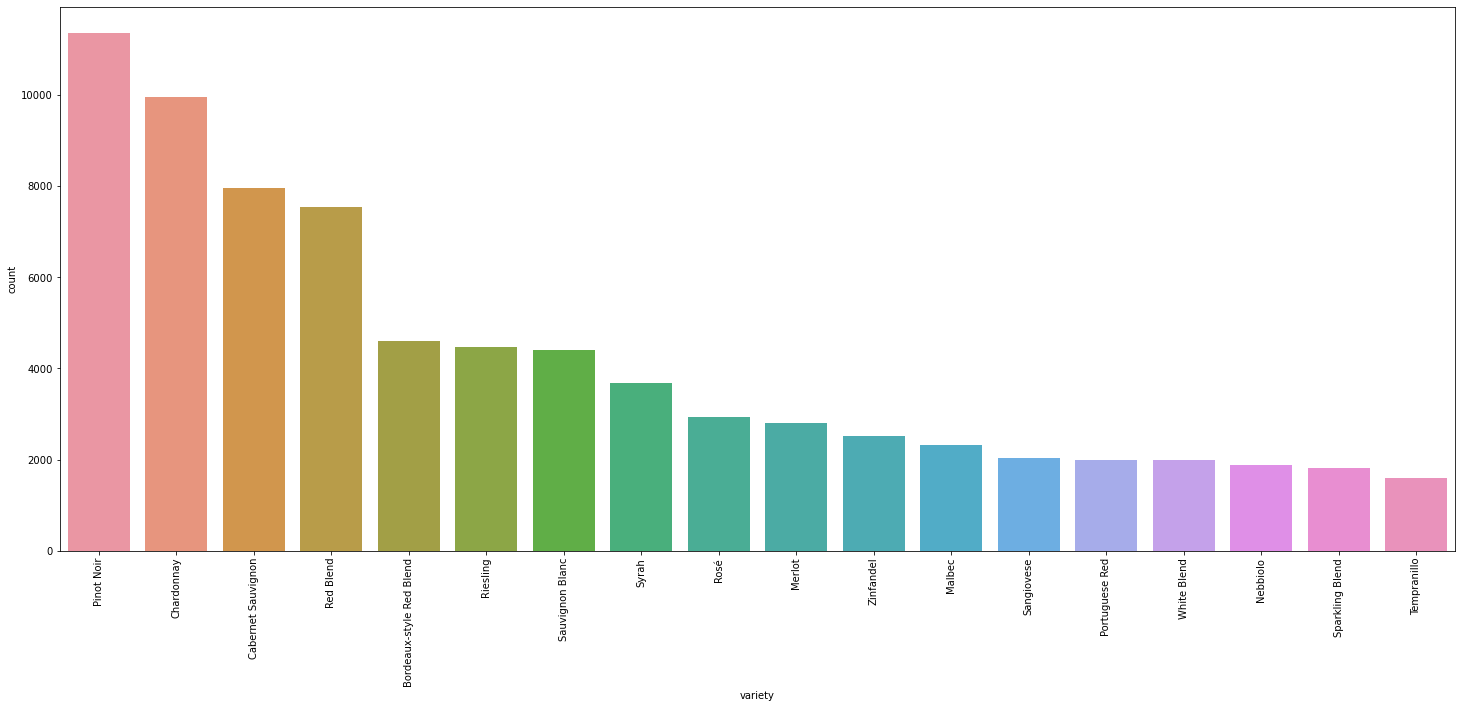

In [39]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 1500)
print(variety_df['variety'].unique())
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()



In [40]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = variety_df['description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names_out()

AttributeError: 'Series' object has no attribute 'ENGLISH_STOP_WORDS'

In [41]:
kmeans = KMeans(n_clusters = len(variety_df['variety'].unique()))
kmeans.fit(X)



NameError: name 'X' is not defined

In [42]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [43]:
variety_df['cluster'] = kmeans.labels_
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")


AttributeError: 'KMeans' object has no attribute 'labels_'

# One-hot coding

In [92]:
"""Creating dummy rows (1,0) for the categorical data"""

country_array = pd.get_dummies(df[df.columns[0]].values)
province_array =pd.get_dummies(df[df.columns[4]].values)
vareity_array = pd.get_dummies(df[df.columns[5]].values)

In [93]:
train_df = [df['price'],df['compound'],df['neg'],df['neu'],df['pos'],country_array,province_array,vareity_array,df['points']]
df_model = pd.concat(train_df, axis=1)

In [94]:
df_model.dropna(inplace = True)

In [95]:
df_model

,price,compound,neg,neu,pos,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,...,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka,points
0,15.0,0.6486,0.000,0.872,0.128,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
1,14.0,-0.1280,0.053,0.947,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,13.0,0.3400,0.000,0.930,0.070,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
3,65.0,0.8176,0.000,0.817,0.183,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
4,15.0,0.1655,0.000,0.961,0.039,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107721,30.0,0.7496,0.000,0.849,0.151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
107722,14.0,0.8934,0.000,0.776,0.224,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
107723,15.0,0.6705,0.000,0.867,0.133,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
107724,14.0,0.8705,0.000,0.791,0.209,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0


# Correlation


In [96]:
from scipy.stats import pearsonr
print("Pearson Correlation:", pearsonr(df.price, df.points))

Pearson Correlation: (0.5527439504336147, 0.0)


In [97]:
import statsmodels.api as sm
print(sm.OLS(df.points, df.price).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                          3.168e+05
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:49:13   Log-Likelihood:                     -5.6170e+05
No. Observations:              107726   AIC:                                  1.123e+06
Df Residuals:                  107725   BIC:                                  1.123e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

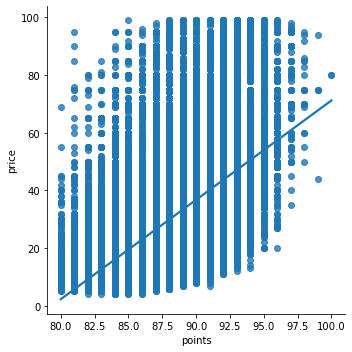

In [98]:
import seaborn as sns
sns.lmplot(y = 'price', x='points', data=df)

# Split 

In [51]:
"""Keeping 70% of the data for training and using the remaining 30% for testing the model."""

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)
x_train = train.iloc[0:,0:-1]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:-1]
y_test = test['points']
x_train

,price,compound,neg,neu,pos,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,...,Xynisteri,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
6236,29.0,0.0000,0.000,1.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44384,20.0,0.6908,0.000,0.831,0.169,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105459,60.0,0.6486,0.000,0.865,0.135,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55456,45.0,0.8860,0.000,0.828,0.172,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88947,50.0,0.8100,0.000,0.837,0.163,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100811,38.0,0.4939,0.052,0.812,0.136,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59155,25.0,0.8720,0.000,0.746,0.254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107330,22.0,0.0258,0.000,0.978,0.022,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68409,36.0,0.8360,0.000,0.835,0.165,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([8.19986260e-02, 4.06235121e+00, 1.17004599e+02, ...,
       7.51703808e+06, 7.51703839e+06, 7.51704027e+06])

In [53]:
from sklearn.metrics import r2_score
import math
training_predictions = model.predict(x_train)
testing_predictions  = model.predict(x_test)
#r2_score(y_test, testing_predictions)
mse = mean_squared_error(y_test, testing_predictions)
rmse = math.sqrt(mse)
mse
#metrics.accuracy_score(y_test, y_pred)

5301982706621884.0

In [54]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.40792460792773333
Testing R-Square -592401349426831.4


In [55]:
r2_score(y_test, testing_predictions)

-592401349426831.4

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)


In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.5086136773167707

In [58]:
r2_score(y_test, y_pred)

0.29685433468720746

In [59]:
#from sklearn import metrics
#metrics.accuracy_score(y_test, y_pred)

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt_model = tree.DecisionTreeRegressor(max_depth=8)
print(i,dt_model.fit(x_train,np.ravel(y_train)),dt_model.score(X=x_test, y=y_test))

y_pred =dt_model.predict(x_test)

10 DecisionTreeRegressor(max_depth=10) 0.45111703139844994
11 DecisionTreeRegressor(max_depth=11) 0.43970312097728326
12 DecisionTreeRegressor(max_depth=12) 0.4271458826067892
13 DecisionTreeRegressor(max_depth=13) 0.4088075195017902
14 DecisionTreeRegressor(max_depth=14) 0.38644129457014065
15 DecisionTreeRegressor(max_depth=15) 0.3661329243967819
16 DecisionTreeRegressor(max_depth=16) 0.34881634016478735
17 DecisionTreeRegressor(max_depth=17) 0.325039937754266
18 DecisionTreeRegressor(max_depth=18) 0.3026957210974792
19 DecisionTreeRegressor(max_depth=19) 0.2831373007735335
20 DecisionTreeRegressor(max_depth=20) 0.26405539262320077
21 DecisionTreeRegressor(max_depth=21) 0.24956234647923425
22 DecisionTreeRegressor(max_depth=22) 0.22870854022987475
23 DecisionTreeRegressor(max_depth=23) 0.21585994035497158
24 DecisionTreeRegressor(max_depth=24) 0.20335921105006427
25 DecisionTreeRegressor(max_depth=25) 0.18703054770171434
26 DecisionTreeRegressor(max_depth=26) 0.1763335811021549
27 De

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dt_model = tree.DecisionTreeRegressor(max_depth=17)
dt_model.fit(x_train,np.ravel(y_train))
dt_model.score(X=x_test, y=y_test)
y_pred =dt_model.predict(x_test)
#metrics.accuracy_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)
print(r2_score(y_test, y_pred))

2.454991001371767
0.32659313196317763


In [62]:
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=20,min_samples_leaf=10,min_samples_split=10,n_estimators=100)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
rf_model.fit(x_train,np.ravel(y_train))
y_pred =rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)
print(r2_score(y_test, y_pred))

2.524397766634125
0.2879781735059944


In [64]:
y_pred =rf_model.predict(x_test).round()
accuracy_score(y_test, y_pred)

0.16878739940848753

# BaggingClassifier

In [65]:
from sklearn.ensemble import BaggingClassifier
b_model=BaggingClassifier()
b_model.fit(x_train,np.ravel(y_train))
y_pred =b_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)
print(r2_score(y_test, y_pred))

2.7222327108416104
0.17200401905951201


In [66]:
accuracy_score(y_test, y_pred)

0.158917394593851

# KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

y_pred =knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)
print(r2_score(y_test, y_pred))

2.494952880418237
0.3044915220973078


In [70]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.494952880418237

In [71]:
accuracy_score(y_test, y_pred.round())

0.15716349129926405

# Making Points Categorical

In [99]:
"""Assigning levels based on points of the wine to convert points into categorical data"""

for i in df_model['points']:
    if i > 95:
        df_model['level'] = 'A'
    elif i < 95 and i>= 90:
        df_model['level'] = 'B'
    elif i < 90 and i >= 85:
        df_model['level'] = 'C'
    elif i < 85 and i>= 80:
        df_model['level'] = 'D'


# Split data

In [100]:
"""Again keeping 70% data for training the models and remaining 30% for testing."""

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)
x_train = train.iloc[0:,0:-1]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:-1]
y_test = test['points']
y_train

86165    88.0
62025    92.0
51650    88.0
63514    86.0
56133    86.0
         ... 
8681     89.0
28047    86.0
18877    92.0
70521    91.0
92752    86.0
Name: points, Length: 67848, dtype: float64

# Linear Regression

In [135]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([ 7.79799334e-16, -7.77156117e-16,  1.52190760e-13, ...,
       -2.99564342e-10, -2.99552875e-10,  1.00000000e+00])

In [136]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("-"*10, "Linear Regression", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"Rsquare for Linear Regression: {r2_score(y_test, y_pred)}")

---------- Linear Regression ----------
Root Mean Square Error: 3.004362234696519e-07
Rsquare for Linear Regression: 0.9999999999999898


# Logistic Regression

In [139]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)

In [123]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('-'*10, "Logistic Regression", '-'*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_pred)}")

---------- Logistic Regression ----------
Root Mean Square Error: 2.640585945017039
R square: 0.21129438454162341
Accuracy Score: 0.16146227388403603


<AxesSubplot:>

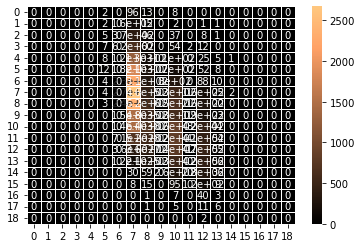

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# Decision Tree Regressor

In [124]:
dt_model = tree.DecisionTreeRegressor(max_depth=8)

print(dt_model.fit(x_train,np.ravel(y_train)),dt_model.score(X=x_test, y=y_test))

y_pred = dt_model.predict(x_test)


DecisionTreeRegressor(max_depth=8) 1.0


In [125]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("-"*10, "Decision Tree Regressor", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

---------- Decision Tree Regressor ----------
Root Mean Square Error: 0.0
R square: 1.0
Accuracy Score: 1.0


In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# RandomForestClassifier

In [126]:
rf_model = RandomForestClassifier(n_estimators=100)

"""np.ravel flattens the pandas Series into an np array. That's what the classifier needs"""
rf_model.fit(x_train,np.ravel(y_train))
y_pred =rf_model.predict(x_test)

In [127]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("-"*10, "Random Forest Classifier", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

---------- Random Forest Classifier ----------
Root Mean Square Error: 0.5934275603176192
R square: 0.9601663830576578
Accuracy Score: 0.9046358071394182


In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# Bagging Classifier

In [128]:
b_model = BaggingClassifier()
b_model.fit(x_train,np.ravel(y_train))
y_pred = b_model.predict(x_test)

In [129]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("-"*10, "Bagging Classifier", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

---------- Bagging Classifier ----------
Root Mean Square Error: 0.0
R square: 1.0
Accuracy Score: 1.0


In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# KNN

In [130]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [132]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("-"*10, "KNN", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

---------- KNN ----------
Root Mean Square Error: 0.2763931067520923
R square: 0.9913589059247029


In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# SVC

In [133]:
from sklearn.svm import SVC 

"""kernel and C are the main args to adjust for linear SVC"""
model2 = SVC(kernel='linear', C=10) 
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [134]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("-"*10, "SVC", "-"*10)
print(f"Root Mean Square Error: {rmse}")
print(f"R square: {r2_score(y_test, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

---------- SVC ----------
Root Mean Square Error: 0.0
R square: 1.0
Accuracy score: 1.0


In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='copper',annot=True,linewidths=1,linecolor='white')

# Recommendation system

In [ ]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

In [ ]:
col = ['province','variety','points']

wine1 = df[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)


In [ ]:

knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)



In [ ]:

for n in range(3):
    query_index = np.random.choice(wine_pivot.shape[0])
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')